In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timezone
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from google.cloud import bigquery
client = bigquery.Client()


This is a google cloud BigQuery SQL which queries chicago crime dataset for the crimes such as (Assault and Battery) happend between 2014 and 2016

In [21]:
def get_weather_and_crime_data(from_year,to_year):
    crime_sql=f"""SELECT
            TIMESTAMP_TRUNC(date,
              DAY) AS date,
            year,
            COUNT(1) AS incidents
          FROM
            `bigquery-public-data.chicago_crime.crime`
          WHERE
            primary_type IN ('BATTERY','ASSAULT')
            AND year BETWEEN {from_year} AND {to_year}
          GROUP BY
            date,
            year"""

    crime_df = client.query(crime_sql).to_dataframe()
    crime_df['date']=pd.to_datetime(crime_df['date'])
    
    weather_sql=f"""SELECT
            TIMESTAMP_TRUNC(TIMESTAMP(CONCAT(year, '-', mo, '-', da)),
              DAY) AS date,
            year,
            AVG(temp) AS temperature
          FROM
            `bigquery-public-data.noaa_gsod.gsod*` AS w
          JOIN
            `bigquery-public-data.noaa_gsod.stations` AS s
          ON
            w.stn = s.usaf
            AND s.name = "CHICAGO O'HARE INTERNATIONAL"
          WHERE
            w._TABLE_SUFFIX BETWEEN '{from_year}'
            AND '{to_year}'
          GROUP BY
            date,
            year"""

    weather_df = client.query(weather_sql).to_dataframe()
    weather_df.head()
    merged_df = pd.merge(crime_df, weather_df, left_on='date', right_on='date')
    
    return merged_df

In [23]:
merged_data = get_weather_and_crime_data('2014','2016')
merged_data.head()

,date,year_x,incidents,year_y,temperature
0,2014-08-31 00:00:00+00:00,2014,257,2014,76.2
1,2014-06-07 00:00:00+00:00,2014,259,2014,71.1
2,2014-07-13 00:00:00+00:00,2014,259,2014,75.8
3,2014-05-25 00:00:00+00:00,2014,260,2014,66.2
4,2014-08-03 00:00:00+00:00,2014,261,2014,75.4


Text(0.5,0,'Temperature')

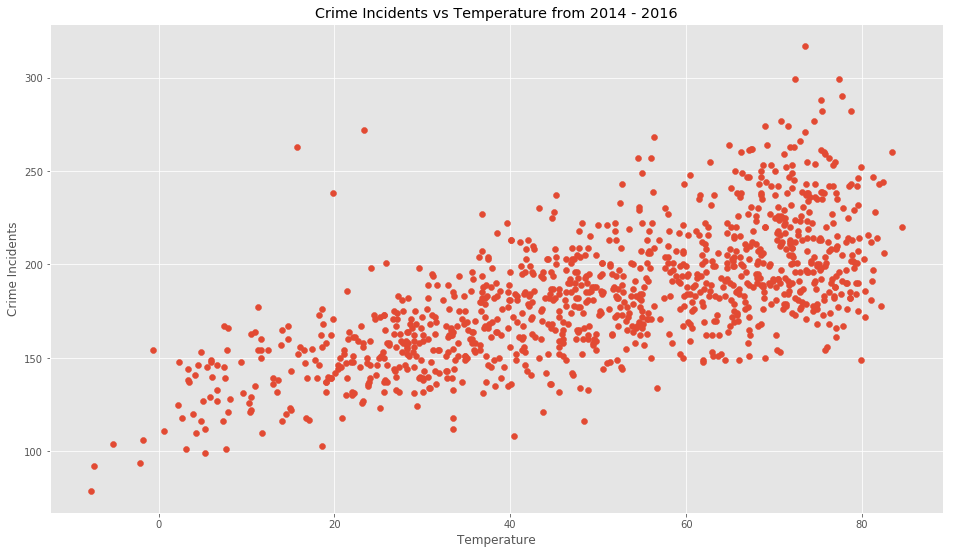

In [24]:
fig = plt.figure(figsize=(16,9))
plt.scatter(merged_data['temperature'],merged_data['incidents'])
plt.title('Crime Incidents vs Temperature from 2014 - 2016')
plt.ylabel("Crime Incidents")
plt.xlabel("Temperature")

In [25]:
merged_data = get_weather_and_crime_data('2011','2013')
merged_data.head()

,date,year_x,incidents,year_y,temperature
0,2011-04-11 00:00:00+00:00,2011,256,2011,62.4
1,2011-07-22 00:00:00+00:00,2011,257,2011,80.5
2,2011-04-13 00:00:00+00:00,2011,257,2011,49.9
3,2011-07-12 00:00:00+00:00,2011,257,2011,80.5
4,2011-09-12 00:00:00+00:00,2011,257,2011,73.6


Text(0.5,0,'Temperature')

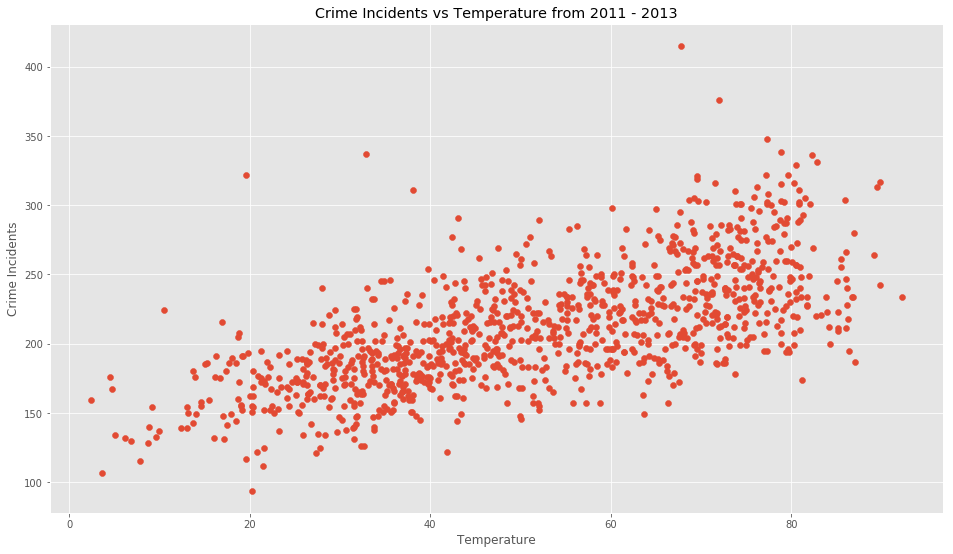

In [27]:
fig = plt.figure(figsize=(16,9))
plt.scatter(merged_data['temperature'],merged_data['incidents'])
plt.title('Crime Incidents vs Temperature from 2011 - 2013')
plt.ylabel("Crime Incidents")
plt.xlabel("Temperature")